In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import chardet

# read in our data
earthquakes = pd.read_csv("earthquake_database.csv")

# set seed for reproducibility
#np.random.seed(0)

In [2]:
# print the first few rows of the date column
print(earthquakes['Date'].head())

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object


In [3]:
# check the data type of our date column
earthquakes['Date'].dtype

dtype('O')

In [4]:
#earthquakes['Date'].sample()
#earthquakes.loc[earthquakes["Date"].str.split("/").apply(lambda x:len(x) != 3), "Date"]
earthquakes.loc[[1,2,3,3378,7512,20650],'Date']

1                      01/04/1965
2                      01/05/1965
3                      01/08/1965
3378     1975-02-23T02:58:41.000Z
7512     1985-04-28T02:53:41.530Z
20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object

In [5]:
# Your turn! Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. (Don't forget to 
# double-check that the dtype is correct!)
earthquakes['Date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format = True, utc = True)
#earthquakes['Date_parsed'] = pd.to_datetime(earthquakes['Date_parsed1'], format = "%Y-%m-%d %H:%M:%S", utc = True)
#earthquakes['Date_paresed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%Y")

In [6]:
earthquakes['Date_parsed'].head()

0   1965-01-02 00:00:00+00:00
1   1965-01-04 00:00:00+00:00
2   1965-01-05 00:00:00+00:00
3   1965-01-08 00:00:00+00:00
4   1965-01-09 00:00:00+00:00
Name: Date_parsed, dtype: datetime64[ns, UTC]

In [7]:
# Your turn! get the day of the month from the date_parsed column
day_of_month_earthquakes = earthquakes['Date_parsed'].dt.day

<AxesSubplot:xlabel='Date_parsed'>

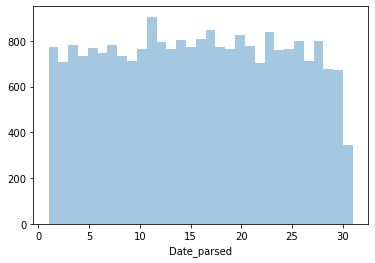

In [8]:
# Your turn! Plot the days of the month from your
# earthquake dataset and make sure they make sense.
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

In [9]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


In [10]:
# look at the first ten thousand bytes to guess the character encoding
with open("ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [11]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [12]:
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("ks-projects-201612-utf8.csv")

In [13]:
# 1. read file
df_with_dups = pd.read_csv("Reviews.csv")

# 2. sort any of the cols
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
# supports multiple idxs as well
df_sorted = df_with_dups.sort_values(by='ProductId', ascending=True)

# 3. Remove duplicates (in-place) based on `subset` cols
subset = ["ProductId", "UserId", "ProfileName", "Time"]
df_sorted.drop_duplicates(subset=subset, keep='first', inplace=True)

In [14]:
print("Data retained after deduplication: ", len(df_sorted)/len(df_with_dups))

Data retained after deduplication:  0.9926326492557005
